## Rotten Tomatoes Movies : Recommandation basé sur les notes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
BASE_DIR = '../../../Data/rotten/'

critic_reviews_filename = BASE_DIR + 'rotten_tomatoes_critic_reviews.csv'
movies_filename = BASE_DIR + 'rotten_tomatoes_movies.csv'

critic_reviews_df = pd.read_csv(critic_reviews_filename)
movies_df = pd.read_csv(movies_filename)

### Analyse des données

In [4]:
critic_reviews_df.head(10)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."


In [5]:
movies_df.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.0,51.0,Upright,86.0,23890.0,8,49,2
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,...,Columbia Pictures,Fresh,96.0,28.0,Upright,79.0,9243.0,6,27,1
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.0,10.0,Upright,87.0,4819.0,0,2,8
9,m/1000204-abraham_lincoln,Abraham Lincoln,The 16th U.S. president (Walter Huston) is por...,NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Benét","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,...,United Artists,Fresh,82.0,11.0,Spilled,40.0,457.0,4,9,2


In [6]:
critic_reviews_df.describe().T

,count,unique,top,freq
rotten_tomatoes_link,1130017,17712,m/star_wars_the_rise_of_skywalker,992
critic_name,1111488,11108,Emanuel Levy,8173
top_critic,1130017,2,False,841481
publisher_name,1130017,2230,New York Times,13293
review_type,1130017,2,Fresh,720210
review_score,824081,814,3/5,90273
review_date,1130017,8015,2000-01-01,48019
review_content,1064211,949181,Parental Content Review,267


In [7]:
critic_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [8]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,17398.0,102.214048,1.870251e+01,5.0,90.0,99.0,111.0,266.0
tomatometer_rating,17668.0,60.884763,2.844335e+01,0.0,38.0,67.0,86.0,100.0
tomatometer_count,17668.0,57.139801,6.837005e+01,5.0,12.0,28.0,75.0,574.0
audience_rating,17416.0,60.554260,2.054337e+01,0.0,45.0,63.0,78.0,100.0
audience_count,17415.0,143940.068332,1.763577e+06,5.0,707.5,4277.0,24988.0,35797635.0
tomatometer_top_critics_count,17712.0,14.586326,1.514635e+01,0.0,3.0,8.0,23.0,69.0
tomatometer_fresh_critics_count,17712.0,36.374831,5.260104e+01,0.0,6.0,16.0,44.0,497.0
tomatometer_rotten_critics_count,17712.0,20.703139,3.024844e+01,0.0,3.0,8.0,24.0,303.0


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [10]:
critic_reviews_df.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')

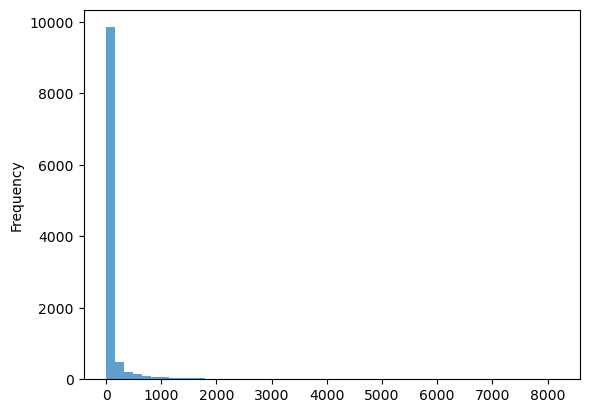

In [11]:
critic_reviews_df.critic_name.value_counts().plot.hist(alpha=.7, bins=50)
plt.show()

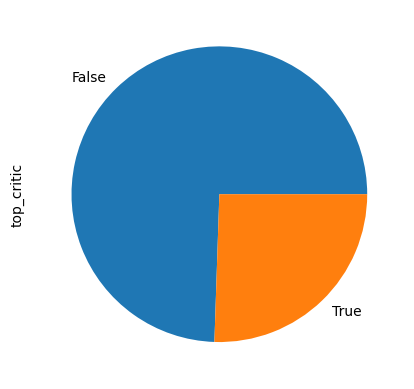

In [12]:
critic_reviews_df.top_critic.value_counts().plot.pie()
plt.show()

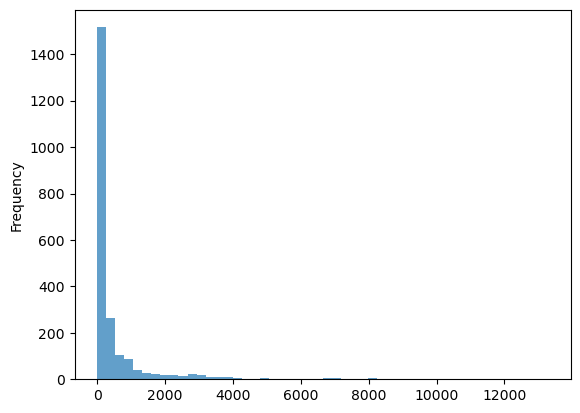

In [13]:
critic_reviews_df.publisher_name.value_counts().plot.hist(alpha=.7, bins=50)
plt.show()

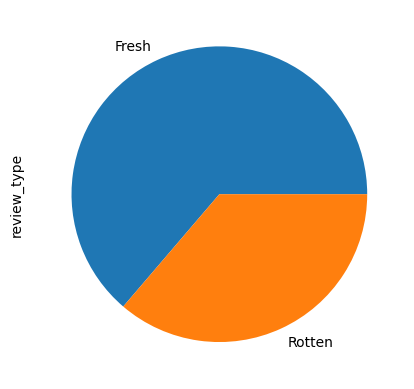

In [14]:
critic_reviews_df.review_type.value_counts().plot.pie()
plt.show()

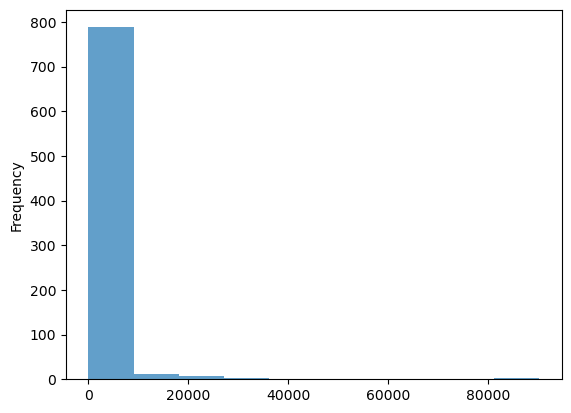

In [15]:
critic_reviews_df.review_score.value_counts().plot.hist(alpha=.7)
plt.show()

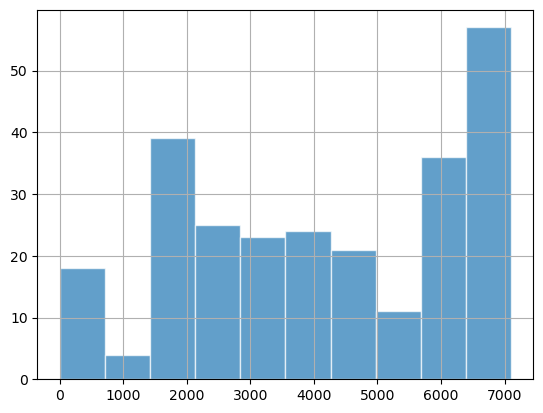

In [16]:
critic_reviews_df.review_content.str.len().value_counts().hist(alpha=.7, edgecolor='white')
plt.show()

In [17]:
movies_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [18]:
len(critic_reviews_df), len(movies_df)

(1130017, 17712)

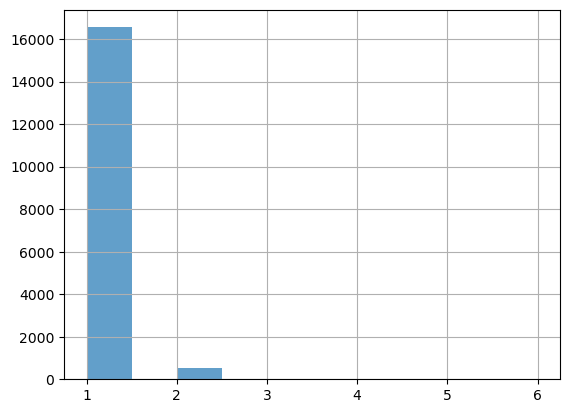

In [19]:
movies_df.movie_title.value_counts().hist(alpha=.7)
plt.show()

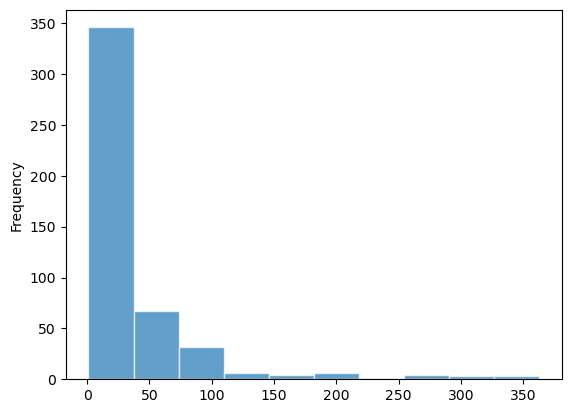

In [20]:
movies_df.movie_info.str.len().value_counts().plot.hist(alpha=.7, edgecolor='white')
plt.show()

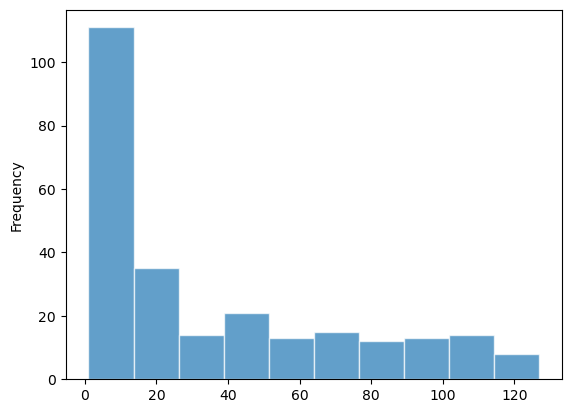

In [21]:
movies_df.critics_consensus.str.len().value_counts().plot.hist(alpha=.7, edgecolor='white')
plt.show()

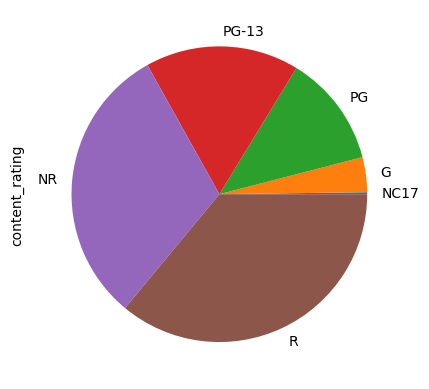

In [22]:
movies_df.content_rating.value_counts().sort_values().plot.pie()
plt.show()

### Recommandation

In [23]:
critic_reviews_ratings_df = critic_reviews_df[
    ['rotten_tomatoes_link', 'critic_name', 'publisher_name', 'review_score']]
critic_reviews_ratings_df = critic_reviews_ratings_df.dropna(axis=0)
critic_reviews_ratings_df[['publisher_name', 'review_score']].groupby('publisher_name')['review_score'].unique()

publisher_name
1428 Elm                                        [3.5/4, 4/4, 3.5/5, 2.5/4]
1More Film Blog          [3/4, 3.5/5, 4/5, 3/5, 2.5/5, 2/5, 1.5/4, 2.5/...
2 Minute Telly                                                  [3/5, 4/5]
24 Horas                                                           [4.5/5]
25YL (25 Years Later)                            [5/5, 4/5, 3/5, 1/5, 2/5]
                                               ...                        
tonymedley.com           [3/10, 4/5, 7/10, 0/10, 8/10, 9/10, 5/10, 10/1...
vocalo.org                                   [4/4, 2.5/4, 3/4, 2/4, 3.5/4]
www.kcactive.com                            [4/5, 3/5, 1/5, 2/5, 5/5, 0/5]
www.susangranger.com     [5/5, 7/10, 6/10, 5/10, 2/5, 4/5, 3/5, 3/10, 8...
ÜberCiné                                   [4/5, 1/5, 2/5, 5/5, 3/5, 9/10]
Name: review_score, Length: 1635, dtype: object

In [24]:
ratings_df = pd.merge(movies_df['rotten_tomatoes_link'],
                    critic_reviews_ratings_df[['rotten_tomatoes_link', 'critic_name', 'review_score']],
                    on='rotten_tomatoes_link')
print(len(ratings_df))
ratings_df.head(10)

809510


,rotten_tomatoes_link,critic_name,review_score
0,m/0814255,Ben McEachen,3.5/5
1,m/0814255,Nick Schager,1/4
2,m/0814255,Bill Goodykoontz,3.5/5
3,m/0814255,Jordan Hoffman,B
4,m/0814255,Jim Schembri,3/5
5,m/0814255,Mark Adams,4/5
6,m/0814255,Roger Moore,2/4
7,m/0814255,David Jenkins,2/5
8,m/0814255,Joshua Tyler,3/5
9,m/0814255,Peter Paras,C


In [75]:
CINEMA_NOTATION_DICT = {'A+': 5, 'A': 4, 'A-': 3.7, 'B+': 3.3, 'B': 3,
        'B-': 2.7, 'C+': 2.3, 'C': 2, 'C-': 1.7, 'D+': 1.3, 'D': 1, 'D-': 0.7, 'F': 0}

def cinema_score(notation):
    return CINEMA_NOTATION_DICT.get(notationtion, None)

In [26]:
def to_rating(s):
    try: 
        nd = s.split('/')
        if len(nd) == 2:
            n, d = nd
            n = float(n)
            d = float(d)
            v = 5*n/d
            if v > 5:
                return None
            return v
        if s[0].upper() in 'ABCDF':
            return cinema_score(s.strip())
        return None
    except: 
        #print(s)
        return None

In [27]:
ratings_df['review_score'] = ratings_df['review_score'].apply(to_int)

In [28]:
drop_index = ratings_df[ratings_df['review_score'] == -1].index
ratings_df.drop(drop_index, inplace=True)

In [29]:
len(ratings_df)

807867

In [30]:
ratings_df.head(10)

,rotten_tomatoes_link,critic_name,review_score
0,m/0814255,Ben McEachen,3.50
1,m/0814255,Nick Schager,1.25
2,m/0814255,Bill Goodykoontz,3.50
3,m/0814255,Jordan Hoffman,2.00
4,m/0814255,Jim Schembri,3.00
5,m/0814255,Mark Adams,4.00
6,m/0814255,Roger Moore,2.50
7,m/0814255,David Jenkins,2.00
8,m/0814255,Joshua Tyler,3.00
9,m/0814255,Peter Paras,3.00


In [31]:
ratings_df = ratings_df.rename({'rotten_tomatoes_link': 'movie', 'critic_name': 'user', 'review_score': 'rating'}, axis=1)
ratings_df.head(10)

,movie,user,rating
0,m/0814255,Ben McEachen,3.50
1,m/0814255,Nick Schager,1.25
2,m/0814255,Bill Goodykoontz,3.50
3,m/0814255,Jordan Hoffman,2.00
4,m/0814255,Jim Schembri,3.00
5,m/0814255,Mark Adams,4.00
6,m/0814255,Roger Moore,2.50
7,m/0814255,David Jenkins,2.00
8,m/0814255,Joshua Tyler,3.00
9,m/0814255,Peter Paras,3.00


#### Stats

In [32]:
num_users = ratings_df["user"].nunique()
num_items = ratings_df["movie"].nunique()

print(f'There are {num_users} users and {num_items} movies')

There are 6884 users and 17666 movies


In [33]:
sparsity = (len(ratings_df)/(num_users*num_items))*100
print(f'Rating matrix is only {sparsity}% full')

Rating matrix is only 0.6642946893789354% full


In [34]:
ratings_df['rating'].describe()

count    807867.000000
mean          3.027452
std           1.080823
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

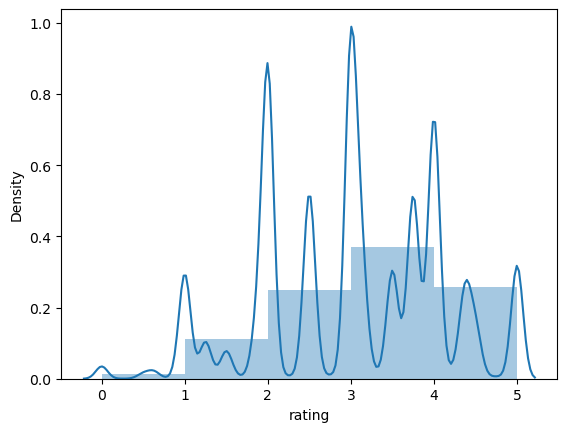

In [35]:
sns.distplot(ratings_df["rating"], bins=5)
plt.show()

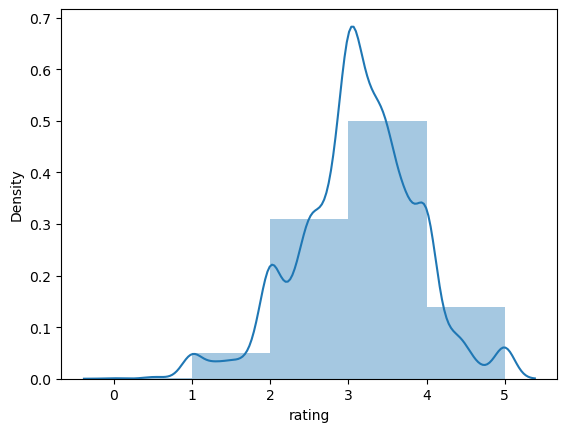

In [36]:
sns.distplot(ratings_df.groupby('user')["rating"].mean(),bins=5)
plt.show()

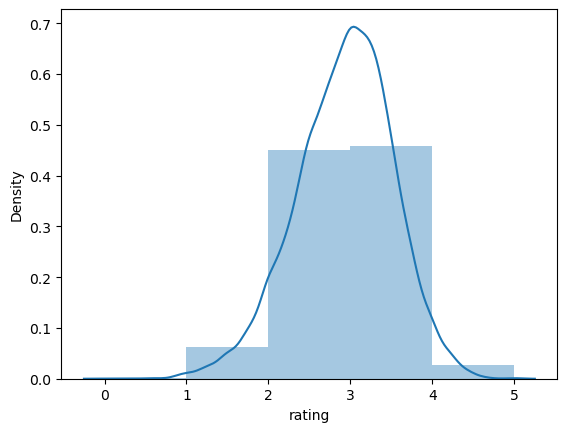

In [37]:
sns.distplot(ratings_df.groupby('movie')["rating"].mean(),bins=5)
plt.show()

#### Train/test

In [38]:
def train_test_ratings(ratings):
    train_indexes, test_indexes = [],[]

    for index in range(len(ratings)):
        if index%5 == 0:
            test_indexes.append(index)
        else:
            train_indexes.append(index)

    train_ratings = ratings.iloc[train_indexes].copy()
    test_ratings = ratings.iloc[test_indexes].copy()
    
    return train_ratings, test_ratings

In [39]:
train_ratings_df, test_ratings_df = train_test_ratings(ratings_df)

#### Global training mean, user means and item means

In [40]:
MEAN = train_ratings_df["rating"].mean()
USER_MEANS = train_ratings_df.groupby("user")["rating"].mean()
ITEM_MEANS = train_ratings_df.groupby("movie")["rating"].mean()

def mean_rating_pred(user_item):
    return MEAN

def user_mean_rating_pred(user_item):
    user = user_item["user"]
    return USER_MEANS[user] if user in USER_MEANS.index else MEAN

def item_mean_rating_pred(user_item):
    item = user_item["movie"]
    return ITEM_MEANS[item] if item in ITEM_MEANS.index else MEAN

#### Test mean predictions

In [41]:
test_ratings_df["mean_prediction"] = test_ratings_df[["user","movie"]].apply(mean_rating_pred,axis=1)
test_ratings_df["muser_prediction"] = test_ratings_df[["user","movie"]].apply(user_mean_rating_pred,axis=1) 
test_ratings_df["mitem_prediction"] = test_ratings_df[["user","movie"]].apply(item_mean_rating_pred,axis=1) 

test_ratings_df.head(5)

,movie,user,rating,mean_prediction,muser_prediction,mitem_prediction
0,m/0814255,Ben McEachen,3.50,3.027516,3.151316,2.735677
5,m/0814255,Mark Adams,4.00,3.027516,3.427481,2.735677
10,m/0814255,Vic Holtreman,3.50,3.027516,3.438144,2.735677
15,m/0814255,Jeffrey M. Anderson,1.25,3.027516,3.442428,2.735677
20,m/0814255,Stephen Whitty,3.75,3.027516,3.086436,2.735677


#### Métriques

In [42]:
def mae(predictions, truth):
    return np.mean(np.abs(predictions - truth))

def mse(predictions, truth):
    return np.mean(np.square(predictions - truth))

def rmse(predictions, truth):
    return np.sqrt(mse(predictions, truth))

def all_metrics(predictions,truth):
    return [f(predictions,truth) for f in [mae,mse,rmse]]

In [43]:
def rr(list_items):
    relevant_indexes = np.asarray(list_items).nonzero()[0]
    return 1 / (relevant_indexes[0] + 1) if len(relevant_indexes) > 0 else 0

def mrr(list_list_items):
    rr_list = [rr(list_items) for list_items in list_list_items]
    return np.mean(rr_list)

In [44]:
test_list = [[0,0,1],[0,1,0],[1,0,0],[0,0,0]]
print(mrr(test_list)) #0.4583333333333333

0.4583333333333333


In [45]:
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return r[0] +  np.sum(r[1:] / np.log2(np.arange(3, r.size + 2)))
    return 0.

In [46]:
r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
print(dcg_at_k(r, 1)) #3.0
print(dcg_at_k(r, 2)) #4.2618595071429155

3.0
4.2618595071429155


In [47]:
def ndcg_at_k(r, k):
    dcg_max =  np.max(dcg_at_k(sorted(r)[::-1], k))
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k)/dcg_max

In [48]:
r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]    
print(ndcg_at_k(r, 1)) #1.0
print(ndcg_at_k(r, 4)) #0.794285

1.0
0.7942854176010882


#### Résultats

In [49]:
metrics = ["mae","mse","rmse"]
results_df = pd.DataFrame()

results_df["metrics"] = metrics
results_df["mean_prediction"] = all_metrics(test_ratings_df["mean_prediction"],test_ratings_df["rating"])
results_df["muser_prediction"] = all_metrics(test_ratings_df["muser_prediction"],test_ratings_df["rating"])
results_df["mitem_prediction"] = all_metrics(test_ratings_df["mitem_prediction"],test_ratings_df["rating"])
results_df = results_df.set_index("metrics")

results_df.head()

,mean_prediction,muser_prediction,mitem_prediction
metrics,,,
mae,0.873207,0.813881,0.769587
mse,1.167515,1.019638,0.943279
rmse,1.080516,1.009771,0.971225


In [50]:
print('---Best Models / Metrics: ---')
results_df.idxmin(1)

---Best Models / Metrics: ---


metrics
mae     mitem_prediction
mse     mitem_prediction
rmse    mitem_prediction
dtype: object

#### Surprise

In [51]:
#! pip install --upgrade scikit-surprise

In [52]:
from surprise import NormalPredictor, BaselineOnly, SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [53]:
data = Dataset.load_from_df(train_ratings_df[['user', 'movie', 'rating']], Reader(rating_scale=(1, 5)))

In [54]:
BaselineModel = BaselineOnly()
BaselineModel.fit(data.build_full_trainset())

Estimating biases using als...


In [55]:
def opt_bl_rating_pred(user_item):
    user = user_item["user"]
    item = user_item["movie"]
    prediction = BaselineModel.predict(user,item)
    return prediction.est

test_ratings_df["opt_bl_prediction"] = test_ratings_df[["user","movie"]].apply(opt_bl_rating_pred,axis=1) 
test_ratings_df.head(5)

,movie,user,rating,mean_prediction,muser_prediction,mitem_prediction,opt_bl_prediction
0,m/0814255,Ben McEachen,3.50,3.027516,3.151316,2.735677,2.854379
5,m/0814255,Mark Adams,4.00,3.027516,3.427481,2.735677,3.118106
10,m/0814255,Vic Holtreman,3.50,3.027516,3.438144,2.735677,3.141642
15,m/0814255,Jeffrey M. Anderson,1.25,3.027516,3.442428,2.735677,3.091749
20,m/0814255,Stephen Whitty,3.75,3.027516,3.086436,2.735677,2.830411


In [56]:
SVDmodel = SVD()
SVDmodel.fit(data.build_full_trainset())

In [57]:
def svd_rating_pred(user_item):
    user = user_item["user"]
    item = user_item["movie"]
    prediction = SVDmodel.predict(user,item)
    return prediction.est

test_ratings_df["svd_prediction"] = test_ratings_df[["user","movie"]].apply(svd_rating_pred,axis=1) 
test_ratings_df.head(5)

,movie,user,rating,mean_prediction,muser_prediction,mitem_prediction,opt_bl_prediction,svd_prediction
0,m/0814255,Ben McEachen,3.50,3.027516,3.151316,2.735677,2.854379,2.698376
5,m/0814255,Mark Adams,4.00,3.027516,3.427481,2.735677,3.118106,3.203224
10,m/0814255,Vic Holtreman,3.50,3.027516,3.438144,2.735677,3.141642,3.292657
15,m/0814255,Jeffrey M. Anderson,1.25,3.027516,3.442428,2.735677,3.091749,3.085021
20,m/0814255,Stephen Whitty,3.75,3.027516,3.086436,2.735677,2.830411,2.827282


In [58]:
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans

KNNmodel = KNNBasic()
KNNmodel.fit(data.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [59]:
def knn_rating_pred(user_item):
    user = user_item["user"]
    item = user_item["movie"]
    prediction = KNNmodel.predict(user,item)
    return prediction.est

test_ratings_df["knn_prediction"] = test_ratings_df[["user","movie"]].apply(knn_rating_pred,axis=1) 
test_ratings_df.head(5)

,movie,user,rating,mean_prediction,muser_prediction,mitem_prediction,opt_bl_prediction,svd_prediction,knn_prediction
0,m/0814255,Ben McEachen,3.50,3.027516,3.151316,2.735677,2.854379,2.698376,2.837384
5,m/0814255,Mark Adams,4.00,3.027516,3.427481,2.735677,3.118106,3.203224,2.848680
10,m/0814255,Vic Holtreman,3.50,3.027516,3.438144,2.735677,3.141642,3.292657,2.933733
15,m/0814255,Jeffrey M. Anderson,1.25,3.027516,3.442428,2.735677,3.091749,3.085021,2.926492
20,m/0814255,Stephen Whitty,3.75,3.027516,3.086436,2.735677,2.830411,2.827282,2.792761


In [60]:
results_df["opt_bl_prediction"] = all_metrics(test_ratings_df["opt_bl_prediction"],test_ratings_df["rating"])
results_df["svd_prediction"] = all_metrics(test_ratings_df["svd_prediction"],test_ratings_df["rating"])
results_df["knn_prediction"] = all_metrics(test_ratings_df["knn_prediction"],test_ratings_df["rating"])

In [61]:
results_df.head()

,mean_prediction,muser_prediction,mitem_prediction,opt_bl_prediction,svd_prediction,knn_prediction
metrics,,,,,,
mae,0.873207,0.813881,0.769587,0.703705,0.596406,0.648000
mse,1.167515,1.019638,0.943279,0.797493,0.597603,0.699307
rmse,1.080516,1.009771,0.971225,0.893025,0.773048,0.836246


In [62]:
print('---Best Models / Metrics: ---')
results_df.idxmin(1)

---Best Models / Metrics: ---


metrics
mae     svd_prediction
mse     svd_prediction
rmse    svd_prediction
dtype: object

In [63]:
already_seen = (
    train_ratings_df 
    .groupby("user")["movie"]
    .apply(list)
    .to_dict()
    )

ground_truth = (
    test_ratings_df[test_ratings_df.rating >= 5] 
    .groupby("user")["movie"]
    .apply(list)
    .to_dict()
    )

In [64]:
existing_items = set(train_ratings_df["movie"].unique())
print("The recommender system will have to pick a few items from",len(existing_items),"possible items")

The recommender system will have to pick a few items from 17643 possible items


In [65]:
mse = ((test_ratings_df["rating"] - test_ratings_df["svd_prediction"])**2).mean()
mae = ((test_ratings_df["rating"] - test_ratings_df["svd_prediction"]).abs()).mean()

print(f"MSE: {mse} -- MAE: {mae}")

MSE: 0.5976031162673583 -- MAE: 0.5964060854124978


#### Liste des élements pertinents

In [66]:
def model_rating_pred(model,user,item):
    prediction = model.predict(user,item)
    return prediction.est

In [67]:
list_of_rel = []
    
for user,will_see in ground_truth.items():
    rel_list = []
    will_see = set(will_see)
    has_seen = set(already_seen.get(user, []))
    can_see = [(mid,model_rating_pred(SVDmodel,user,mid)) for mid in existing_items - has_seen]
    
    for movie,score in reversed(sorted(can_see,key=lambda x:x[1])):
        if movie in will_see:
            rel_list.append(1)
            break
        else:
            rel_list.append(0)        
    rel_list[-1] = 1 # when no relevant item exist
    list_of_rel.append(rel_list)

In [68]:
svd_mrr = mrr(list_of_rel)
print(f"On average, the {int(round(1/svd_mrr,0))}th proposed item is relevant (on {len(existing_items)})")

On average, the 26th proposed item is relevant (on 17643)


#### Baseline : films populaires

In [69]:
movie_counts = train_ratings_df.groupby('movie')["rating"].count().sort_values(ascending=False)
popular_item_list = movie_counts.index.tolist()

In [70]:
len(popular_item_list)

17643

In [71]:
print(popular_item_list[:10])

['m/star_wars_the_rise_of_skywalker', 'm/solo_a_star_wars_story', 'm/star_wars_the_last_jedi', 'm/spider_man_far_from_home', 'm/ready_player_one', 'm/star_wars_episode_vii_the_force_awakens', 'm/rogue_one_a_star_wars_story', 'm/shazam', 'm/skyfall', 'm/star_trek_11']


In [72]:
list_of_rel = []

for user,will_see in ground_truth.items():
    rel_list = []
    will_see = set(will_see)
    has_seen = set(already_seen.get(user, []))
    
    for movie in popular_item_list:
        if movie in has_seen:         # User has already seen movie -> Can filter prediction
            continue
        elif movie in will_see:       # User will see, spot on suggestion !         
            rel_list.append(1) # To Complete
            break
        else:                         # No clue.
            rel_list.append(0) # To Complete
            
    if rel_list[-1] == 1:             # when no relevant item exist, no need to take it into account.
        list_of_rel.append(rel_list)

In [73]:
pop_mrr = mrr(list_of_rel)
print(f"On average, the {int(round(1/pop_mrr,0))}th proposed item is relevant (on {len(existing_items)})")

On average, the 119th proposed item is relevant (on 17643)
